<a href="https://colab.research.google.com/github/vvrgit/FDP-NNDL/blob/main/Load_Forecasting_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implement ANN with keras - Regression Problem

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
import pandas as pd # For Data manipulation

#Load Data

In [31]:
load_data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/Load.xlsx")
list_of_columns = load_data.columns
load_data.head()

,L(T-1),L(T-2),L(T-24),L(T-48),P(T-1),P(T-2),P(T-24),P(T-48),Day,Season,L(T)
0,4851.90,4309.93,5257.03,4574.50,2313.77,2333.89,2328.34,2285.62,1,2,5604.93
1,5604.93,4851.90,5527.90,5217.88,2005.82,2313.77,2143.30,2097.21,1,2,6012.75
2,6012.75,5604.93,5820.83,5314.53,1886.45,2005.82,2024.52,2008.19,1,2,6163.53
3,6163.53,6012.75,5910.98,5471.73,1810.42,1886.45,1942.67,2008.32,1,2,6310.30
4,6310.30,6163.53,6189.18,5974.50,1805.42,1810.42,2071.41,2038.73,1,2,6606.13


In [54]:
min_load=load_data.min()
print(min_load)
max_load=load_data.max()
print(max_load)

L(T-1)     1229.18
L(T-2)     1229.18
L(T-24)    1229.18
L(T-48)    1229.18
P(T-1)      598.75
P(T-2)      598.75
P(T-24)     598.75
P(T-48)     598.75
Day           0.00
Season        0.00
L(T)       1229.18
dtype: float64
L(T-1)     15096.73
L(T-2)     15096.73
L(T-24)    15096.73
L(T-48)    15096.73
P(T-1)     20000.00
P(T-2)     20000.00
P(T-24)    20000.00
P(T-48)    20000.00
Day            1.00
Season         2.00
L(T)       15096.73
dtype: float64


In [69]:
min_target=load_data['L(T)'].min()
print(min_target)
max_target=load_data['L(T)'].max()
print(max_target)
min_price=load_data['P(T-1)'].min()
print(min_price)
max_price=load_data['P(T-1)'].max()
print(max_price)

1229.18
15096.73
598.75
20000.0


#Statistical Information

In [33]:
load_data.describe()

,L(T-1),L(T-2),L(T-24),L(T-48),P(T-1),P(T-2),P(T-24),P(T-48),Day,Season,L(T)
count,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000,23304.000000
mean,6599.603310,6599.702593,6603.358441,6605.967243,5059.075687,5058.746726,5053.714292,5048.181380,0.143194,0.988671,6599.482203
std,2012.373466,2012.203412,2011.188930,2010.564244,3135.934965,3135.818725,3133.813298,3131.785046,0.350278,0.789283,2012.563564
min,1229.180000,1229.180000,1229.180000,1229.180000,598.750000,598.750000,598.750000,598.750000,0.000000,0.000000,1229.180000
25%,5134.032500,5134.032500,5137.087500,5139.557500,2995.015000,2994.965000,2994.637500,2993.872500,0.000000,0.000000,5134.032500
50%,6355.980000,6355.980000,6359.210000,6362.490000,3879.070000,3878.760000,3875.995000,3872.970000,0.000000,1.000000,6355.980000
75%,7883.382500,7883.382500,7888.057500,7890.882500,6000.290000,6000.282500,5999.212500,5990.867500,0.000000,2.000000,7883.382500
max,15096.730000,15096.730000,15096.730000,15096.730000,20000.000000,20000.000000,20000.000000,20000.000000,1.000000,2.000000,15096.730000


# Missing Value Treatment

In [34]:
load_data.isnull().any()

L(T-1)     False
L(T-2)     False
L(T-24)    False
L(T-48)    False
P(T-1)     False
P(T-2)     False
P(T-24)    False
P(T-48)    False
Day        False
Season     False
L(T)       False
dtype: bool

In [35]:
load_data.isnull().sum()

L(T-1)     0
L(T-2)     0
L(T-24)    0
L(T-48)    0
P(T-1)     0
P(T-2)     0
P(T-24)    0
P(T-48)    0
Day        0
Season     0
L(T)       0
dtype: int64

In [36]:
load_data = load_data.fillna(method='ffill')

#Outliers

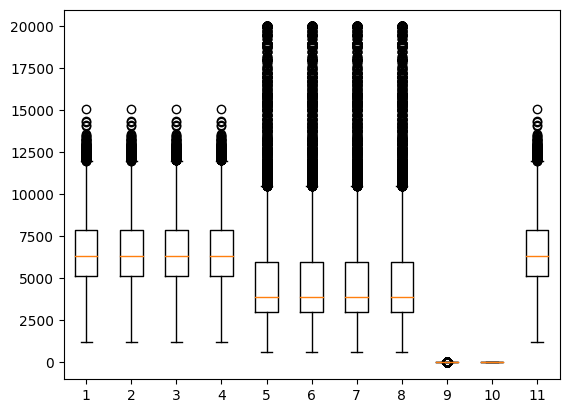

In [37]:
# Creating plot
plt.boxplot(load_data)

# show plot
plt.show()

In [38]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [39]:
sample_outliers_LT1 = detect_outliers_zscore(load_data['L(T-1)'])
print("Outliers in L(T-1) column from Z-scores method: ", sample_outliers_LT1)
sample_outliers_LT2 = detect_outliers_zscore(load_data['L(T-2)'])
print("Outliers in L(T-2) column from Z-scores method: ", sample_outliers_LT2)
sample_outliers_LT24 = detect_outliers_zscore(load_data['L(T-24)'])
print("Outliers in L(T-24) column from Z-scores method: ", sample_outliers_LT24)
sample_outliers_LT48 = detect_outliers_zscore(load_data['L(T-48)'])
print("Outliers in L(T-48) column from Z-scores method: ", sample_outliers_LT48)

sample_outliers_PT1 = detect_outliers_zscore(load_data['P(T-1)'])
print("Outliers in P(T-1) column from Z-scores method: ", sample_outliers_PT1)
sample_outliers_PT2 = detect_outliers_zscore(load_data['P(T-2)'])
print("Outliers in P(T-2) column from Z-scores method: ", sample_outliers_PT2)
sample_outliers_PT24 = detect_outliers_zscore(load_data['P(T-24)'])
print("Outliers in P(T-24) column from Z-scores method: ", sample_outliers_PT24)
sample_outliers_PT48 = detect_outliers_zscore(load_data['P(T-48)'])
print("Outliers in P(T-48) column from Z-scores method: ", sample_outliers_PT48)


sample_outliers_day = detect_outliers_zscore(load_data['Day'])
print("Outliers in day column from Z-scores method: ", sample_outliers_day)
sample_outliers_season = detect_outliers_zscore(load_data['Season'])
print("Outliers in season column from Z-scores method: ", sample_outliers_season)
sample_outliers_LT = detect_outliers_zscore(load_data['L(T)'])
print("Outliers in L(T) column from Z-scores method: ", sample_outliers_LT)

Outliers in L(T-1) column from Z-scores method:  [12728.33, 12720.2, 12780.82, 12749.8, 12954.48, 13320.7, 12810.97, 12787.55, 12757.33, 12656.68, 13097.08, 14322.58, 15096.73, 13406.58, 13504.18, 13601.4, 12754.43, 12863.05, 12866.85, 14159.15, 14053.95, 13155.58, 12835.0, 12872.38, 12664.95, 12867.35, 12986.71, 12805.41, 12698.22, 12929.78, 12948.2, 13333.98, 12900.9, 13241.95, 12715.88, 12921.48, 12699.22, 13091.42, 12665.86, 12821.43, 12660.9, 12829.8, 12905.7, 12834.05, 12996.92, 13223.73, 13283.27, 12806.7, 12889.42, 12828.34, 12712.31, 12934.43, 13057.85, 13493.35, 13530.63, 13213.85, 12807.16, 13043.58, 12781.2, 13238.55, 14371.15, 12938.3, 13093.52, 12891.55]
Outliers in L(T-2) column from Z-scores method:  [12728.33, 12720.2, 12780.82, 12749.8, 12954.48, 13320.7, 12810.97, 12787.55, 12757.33, 12656.68, 13097.08, 14322.58, 15096.73, 13406.58, 13504.18, 13601.4, 12754.43, 12863.05, 12866.85, 14159.15, 14053.95, 13155.58, 12835.0, 12872.38, 12664.95, 12867.35, 12986.71, 12805.41

#Data Normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data_norm=ms.fit_transform(load_data)
print(load_data_norm)

[[0.2612372  0.22215532 0.29045145 ... 1.         1.         0.31553879]
 [0.31553879 0.2612372  0.3099841  ... 1.         1.         0.34494702]
 [0.34494702 0.31553879 0.33110751 ... 1.         1.         0.35581988]
 ...
 [0.04409575 0.04811016 0.09046587 ... 0.         0.         0.043971  ]
 [0.043971   0.04409575 0.08935392 ... 0.         0.         0.05531402]
 [0.05531402 0.043971   0.08745741 ... 0.         0.         0.05772108]]


#Data Split

In [41]:
dataset=pd.DataFrame(data=load_data_norm[0:,0:],columns=list_of_columns)
dataset.head()

,L(T-1),L(T-2),L(T-24),L(T-48),P(T-1),P(T-2),P(T-24),P(T-48),Day,Season,L(T)
0,0.261237,0.222155,0.290451,0.241234,0.088397,0.089434,0.089148,0.086946,1.0,1.0,0.315539
1,0.315539,0.261237,0.309984,0.287628,0.072525,0.088397,0.079611,0.077235,1.0,1.0,0.344947
2,0.344947,0.315539,0.331108,0.294598,0.066372,0.072525,0.073489,0.072647,1.0,1.0,0.355820
3,0.355820,0.344947,0.337608,0.305934,0.062453,0.066372,0.069270,0.072654,1.0,1.0,0.366404
4,0.366404,0.355820,0.357670,0.342189,0.062195,0.062453,0.075905,0.074221,1.0,1.0,0.387736


In [42]:
X=dataset.iloc[:,0:10].values
Y=dataset.iloc[:,10:].values
print(X)
print(Y)

[[0.2612372  0.22215532 0.29045145 ... 0.08694646 1.         1.        ]
 [0.31553879 0.2612372  0.3099841  ... 0.07723523 1.         1.        ]
 [0.34494702 0.31553879 0.33110751 ... 0.07264687 1.         1.        ]
 ...
 [0.04409575 0.04811016 0.09046587 ... 0.48456929 0.         0.        ]
 [0.043971   0.04409575 0.08935392 ... 0.48456929 0.         0.        ]
 [0.05531402 0.043971   0.08745741 ... 0.48456929 0.         0.        ]]
[[0.31553879]
 [0.34494702]
 [0.35581988]
 ...
 [0.043971  ]
 [0.05531402]
 [0.05772108]]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_test.shape)
print(X_train.shape)

[[0.36760278]
 [0.32372193]
 [0.42424942]
 [0.27153679]
 [0.39462053]]
(4661, 10)
(18643, 10)


#ANN Model Development

In [44]:
#First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(18,activation='relu', input_shape=(10,)))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #output Layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                198       
                                                                 
 dense_5 (Dense)             (None, 18)                342       
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Model Compilation

In [45]:
model.compile(loss='MSE',
              optimizer=Adam(),
              metrics=['MSE'])

#Model Training

In [65]:
checkpoint_filepath = 'ANN.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True)

In [66]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=10,verbose=1,callbacks=[model_checkpoint_callback])

Epoch 1/10
583/583 [==============================] - 1s 3ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0018 - val_MSE: 0.0018
Epoch 2/10
583/583 [==============================] - 1s 3ms/step - loss: 0.0018 - MSE: 0.0018 - val_loss: 0.0018 - val_MSE: 0.0018
Epoch 3/10
583/583 [==============================] - 2s 3ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0017 - val_MSE: 0.0017
Epoch 4/10
583/583 [==============================] - 2s 4ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0017 - val_MSE: 0.0017
Epoch 5/10
583/583 [==============================] - 2s 3ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0017 - val_MSE: 0.0017
Epoch 6/10
583/583 [==============================] - 1s 2ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0017 - val_MSE: 0.0017
Epoch 7/10
583/583 [==============================] - 1s 2ms/step - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0018 - val_MSE: 0.0018
Epoch 8/10
583/583 [==============================] - 1s 3ms/step - loss: 0.

#Model Testing

In [50]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])

146/146 - 1s - loss: 0.0017 - MSE: 0.0017 - 924ms/epoch - 6ms/step
Test loss: 0.0017252461984753609


#Model Prediction

In [59]:
# Write the index of the test sample to test
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,10))
print(prediction[0]*(max_target-min_target)+min_target)
print(y_test[0]*(max_target-min_target)+min_target)

[0.43172226 0.37417352 0.4711921  0.42951134 0.50918833 0.58765543
 0.33524644 0.3124443  0.         1.        ]
1/1 [==============================] - 0s 25ms/step
[7530.014]
[6326.93]


#Save Model

In [60]:
#model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#LOad Model

In [67]:
# load model
from keras.models import load_model
model = load_model('ANN.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                198       
                                                                 
 dense_5 (Dense)             (None, 18)                342       
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Model Deployment

In [71]:
from keras.models import load_model
model = load_model('ANN.h5')
inputvector=np.zeros((1,10))

LT1=input("enter L(T-1) value")
inputvector[0,0]=(float(LT1)-min_target)/(max_target-min_target)
LT2=input("enter L(T-2) value")
inputvector[0,1]=(float(LT2)-min_target)/(max_target-min_target)
LT24=input("enter L(T-24) value")
inputvector[0,2]=(float(LT24)-min_target)/(max_target-min_target)
LT48=input("enter L(T-48) value")
inputvector[0,3]=(float(LT48)-min_target)/(max_target-min_target)

PT1=input("enter P(T-1) value")
inputvector[0,4]=(float(PT1)-min_price)/(max_target-min_price)
PT2=input("enter P(T-2) value")
inputvector[0,5]=(float(PT2)-min_price)/(max_target-min_price)
PT24=input("enter P(T-24) value")
inputvector[0,6]=(float(PT24)-min_price)/(max_target-min_price)
PT48=input("enter P(T-48) value")
inputvector[0,7]=(float(PT48)-min_price)/(max_target-min_price)


Day=input("enter Day Status")
inputvector[0,8]=(float(Day)-0)/(1-0)
Season=input("enter Season Status")
inputvector[0,9]=(float(Season)-0)/(2-0)

inputvector


enter L(T-1) value1200
enter L(T-2) value1200
enter L(T-24) value1500
enter L(T-48) value1500
enter P(T-1) value8000
enter P(T-2) value8000
enter P(T-24) value12000
enter P(T-48) value12000
enter Day Status0
enter Season Status1


array([[-0.00210419, -0.00210419,  0.01952904,  0.01952904,  0.51050215,
         0.51050215,  0.78640266,  0.78640266,  0.        ,  0.5       ]])

In [72]:
inputvector[0].reshape(1,10)

array([[-0.00210419, -0.00210419,  0.01952904,  0.01952904,  0.51050215,
         0.51050215,  0.78640266,  0.78640266,  0.        ,  0.5       ]])

In [76]:
prediction = model.predict(inputvector[0].reshape(1,10))
print("Predcited Load=",prediction[0]*(max_target-min_target)+min_target)

1/1 [==============================] - 0s 25ms/step
Predcited Load= [1829.9052]


# **#Thank You**